# Caption Providers

This notebook compares the default large model whisper settings with the results we saw from Google Speech and Amazon Transcribe.

In [22]:
import pandas

aws = pandas.read_csv('../docs/output-2024-04-11/report-aws.csv', index_col='druid')
gcp = pandas.read_csv('../docs/output-2024-04-11/report-google.csv', index_col='druid')
whisper = pandas.read_csv('../docs/output-2024-04-11/report-whisper.csv', index_col='druid')

Limit whisper results to the defaults for the Large model:

In [23]:
whisper = whisper[whisper['options'] == "{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"]
whisper

,run_id,file,language,transcript_filename,transcript_language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,diff,options
druid,,,,,,,,,,,,,,,,
bb158br2509,bb158br2509-whisper-017,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,276.907950,0.058499,0.057659,0.079835,0.920165,4331,103,66,96,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bb158br2509-whisper-017.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
bg405cn7261,bg405cn7261-whisper-065,bg405cn7261_v2_sl.mp4,en,bg405cn7261_v2_sl_script.txt,en,148.304139,0.062193,0.059406,0.069897,0.930103,1805,20,86,8,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bg405cn7261-whisper-065.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
bw689yg2740,bw689yg2740-whisper-161,bw689yg2740_sl.mp4,en,bw689yg2740_script.txt,en,971.707062,0.130416,0.122103,0.159572,0.840428,10605,457,770,248,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/bw689yg2740-whisper-161.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
fh290wd1772,fh290wd1772-whisper-209,fh290wd1772_v2_sp_sl.m4a,en,fh290wd1772_v2_sp_sl_script.txt,en,30.420051,0.333333,0.318560,0.419177,0.580823,246,40,16,59,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/fh290wd1772-whisper-209.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
gj097zq7635,gj097zq7635-whisper-257,gj097zq7635_a_sl.m4a,en,gj097zq7635_a_sl_script.txt,en,531.052633,0.132694,0.124085,0.165208,0.834792,6939,333,514,136,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/gj097zq7635-whisper-257.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
gk220dt2833,gk220dt2833-whisper-305,gk220dt2833_Ali_Shan_10of10_sl.mp4,en,gk220dt2833_Ali_Shan_10of10_sl_script.txt,en,180.118251,0.183958,0.169751,0.231985,0.768015,1032,81,96,34,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/gk220dt2833-whisper-305.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
gn213vd3845,gn213vd3845-whisper-353,gn213vd3845_ev_1_sl.mp4,es,gn213vd3845_ev_1_sl_spa_script.txt,es,65.206824,0.216088,0.201767,0.265689,0.734311,542,44,45,48,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/gn213vd3845-whisper-353.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
kp010zv7055,kp010zv7055-whisper-401,kp010zv7055_a_sl.m4a,en,kp010zv7055_a_sl_script.txt,en,159.239696,0.993701,0.993701,0.999908,0.000092,4,269,0,362,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/kp010zv7055-whisper-401.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"
qf378nj5000,qf378nj5000-whisper-449,qf378nj5000_sl.mp4,en,qf378nj5000_script.txt,en,636.403302,0.177680,0.162852,0.209531,0.790469,5377,300,536,210,https://sul-dlss.github.io/whisper-pilot/output-2024-04-11/qf378nj5000-whisper-449.html,"{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': True, 'best_of': 5}"


In [25]:
df = pandas.DataFrame({
    'aws': aws.wer,
    'gcp': gcp.wer,
    'whisper': whisper.wer,
})
df

,aws,gcp,whisper
druid,,,
bb158br2509,0.066887,0.205077,0.058499
bg405cn7261,0.062739,0.103110,0.062193
bw689yg2740,0.190363,0.219629,0.130416
fh290wd1772,0.855072,0.860870,0.333333
gj097zq7635,0.152268,0.379725,0.132694
gk220dt2833,0.139494,0.329555,0.183958
gn213vd3845,0.159306,0.209779,0.216088
kp010zv7055,0.907087,1.000000,0.993701
qf378nj5000,0.197044,NaN,0.177680


Weird, we seem to be missing results for qf378nj5000 in GCP? We will need to rerun this. For now it will be dropped.

In [27]:
df = df.dropna()
df

,aws,gcp,whisper
druid,,,
bb158br2509,0.066887,0.205077,0.058499
bg405cn7261,0.062739,0.103110,0.062193
bw689yg2740,0.190363,0.219629,0.130416
fh290wd1772,0.855072,0.860870,0.333333
gj097zq7635,0.152268,0.379725,0.132694
gk220dt2833,0.139494,0.329555,0.183958
gn213vd3845,0.159306,0.209779,0.216088
kp010zv7055,0.907087,1.000000,0.993701
tc482fh1865,0.118136,0.204659,0.272879


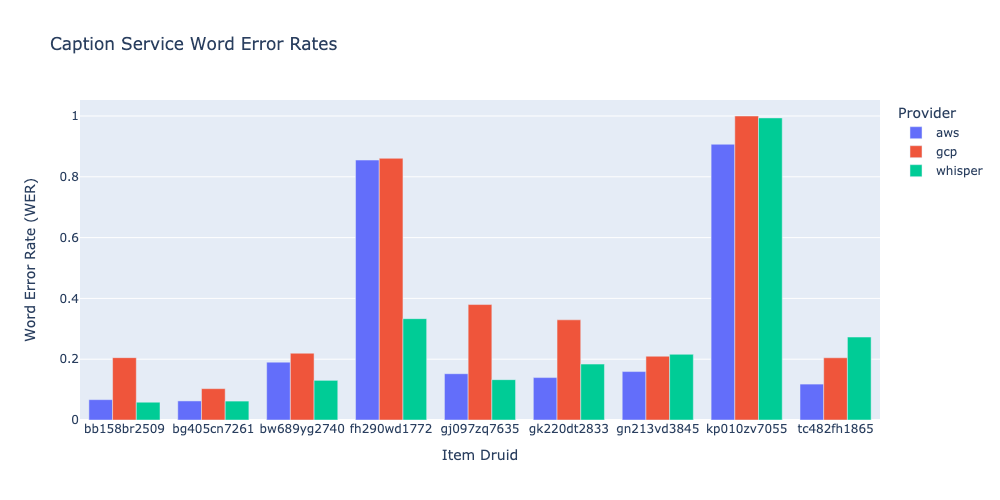

In [39]:
from plotly import express as xp

fig = xp.bar(
    df,
    barmode='group',
    title='Caption Service Word Error Rates',
    labels={
        'value': 'Word Error Rate (WER)',
        'druid': 'Item Druid',
        'variable': 'Provider'
    },
    width=1000
)
fig.show('png')